In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxxxx"

In [3]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [01:05<00:00, 35.5MB/s]
100% 3.58G/3.58G [01:05<00:00, 59.0MB/s]


In [ ]:
!unzip fruits-fresh-and-rotten-for-classification.zip

In [ ]:
base_dir ='/content/dataset'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')


train_freshapples_dir = os.path.join(train_dir,'freshapples')
train_freshbanana_dir = os.path.join(train_dir,'freshbanana')
train_freshoranges_dir = os.path.join(train_dir,'freshoranges')
train_rottenapples_dir = os.path.join(train_dir,'rottenapples')
train_rottenbanana_dir = os.path.join(train_dir,'rottenbanana')
train_rottenoranges_dir = os.path.join(train_dir,'rottenoranges')

test_freshapples_dir = os.path.join(test_dir,'freshapples')
test_freshbanana_dir = os.path.join(test_dir,'freshbanana')
test_freshoranges_dir = os.path.join(test_dir,'freshoranges')
test_rottenapples_dir = os.path.join(test_dir,'rottenapples')
test_rottenbanana_dir = os.path.join(test_dir,'rottenbanana')
test_rottenoranges_dir = os.path.join(test_dir,'rottenoranges')

In [8]:
print("train freshapples:",len(os.listdir(train_freshapples_dir)))
print("train freshbanana:",len(os.listdir(train_freshbanana_dir)))
print("train freshoranges:",len(os.listdir(train_freshoranges_dir)))
print("train rottenapples:",len(os.listdir(train_rottenapples_dir)))
print("train rottenbanana:",len(os.listdir(train_rottenbanana_dir)))
print("train rottenoranges:",len(os.listdir(train_rottenoranges_dir)))


train freshapples: 1693
train freshbanana: 1581
train freshoranges: 1466
train rottenapples: 2342
train rottenbanana: 2224
train rottenoranges: 1595


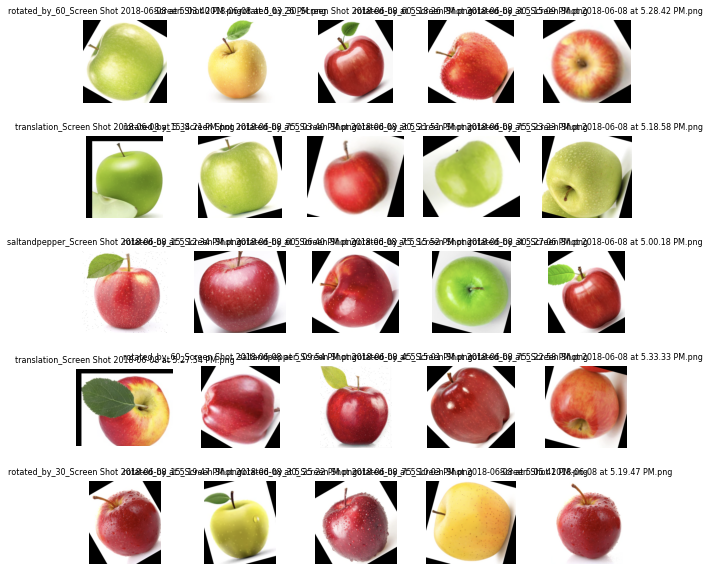

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
#n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  index=random.choice(os.listdir(train_freshapples_dir))
  img_path = os.path.join(train_freshapples_dir,index)
  img = mpimg.imread(img_path)
  #plt.imshow(img)
  axes[i].imshow(img)
  axes[i].set_title(index, fontsize = 8)
 # axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

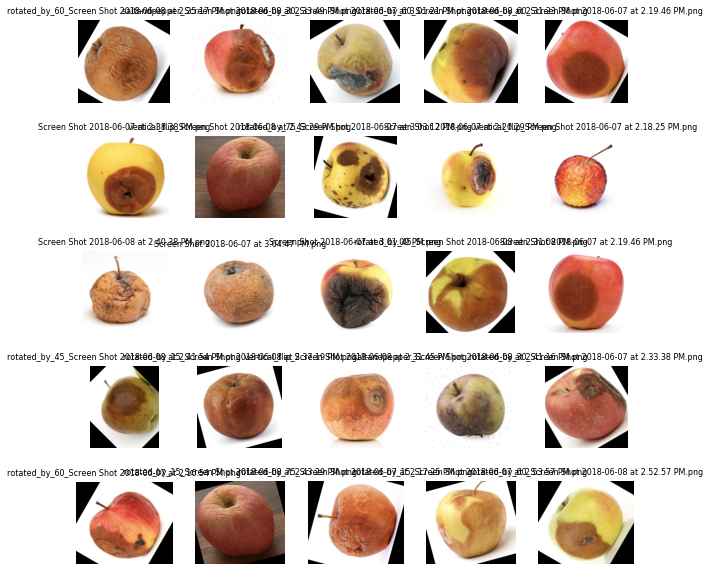

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
#n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  index=random.choice(os.listdir(train_rottenapples_dir))
  img_path = os.path.join(train_rottenapples_dir,index)
  img = mpimg.imread(img_path)
  #plt.imshow(img)
  axes[i].imshow(img)
  axes[i].set_title(index, fontsize = 8)
 # axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    subset='training',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    )


validation_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                    batch_size=32,
                                                     subset='validation',
                                                    class_mode='categorical',
                                                    )


test_generator = test_datagen.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    )

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


Original Image Shape (240, 232, 3)


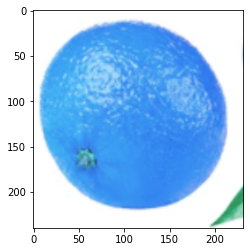

In [12]:
import cv2
filePath = "/content/dataset/train/freshoranges/Screen Shot 2018-06-12 at 11.50.28 PM.png"
bgrimg = cv2.imread(str(filePath))
plt.imshow(bgrimg)
print('Original Image Shape',bgrimg.shape)

In [17]:
train_generator.image_shape

(150, 150, 3)

In [21]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) # Note the only change is that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [22]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=250,
    epochs=10,
    validation_data = validation_generator,
    #validation_steps = 50,
    verbose=1
)

Epoch 1/10
250/250 [==============================] - 100s 400ms/step - loss: 0.9133 - acc: 0.6646 - val_loss: 0.3638 - val_acc: 0.8145
Epoch 2/10
250/250 [==============================] - 95s 378ms/step - loss: 0.5127 - acc: 0.8144 - val_loss: 0.0345 - val_acc: 0.8760
Epoch 3/10
250/250 [==============================] - 93s 374ms/step - loss: 0.4018 - acc: 0.8547 - val_loss: 0.1108 - val_acc: 0.8857
Epoch 4/10
250/250 [==============================] - 93s 373ms/step - loss: 0.3477 - acc: 0.8710 - val_loss: 0.2624 - val_acc: 0.9036
Epoch 5/10
250/250 [==============================] - 93s 371ms/step - loss: 0.2898 - acc: 0.8894 - val_loss: 0.4110 - val_acc: 0.8806
Epoch 6/10
250/250 [==============================] - 93s 371ms/step - loss: 0.2723 - acc: 0.8979 - val_loss: 0.7420 - val_acc: 0.9164
Epoch 7/10
250/250 [==============================] - 93s 370ms/step - loss: 0.2320 - acc: 0.9146 - val_loss: 5.6142e-04 - val_acc: 0.9380
Epoch 8/10
250/250 [==============================

In [23]:

train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

Text(0.5, 0, 'epochs')

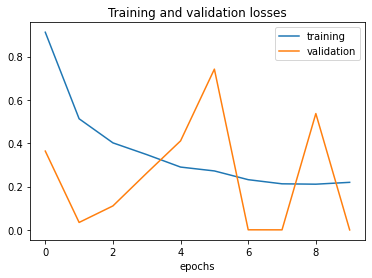

In [24]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

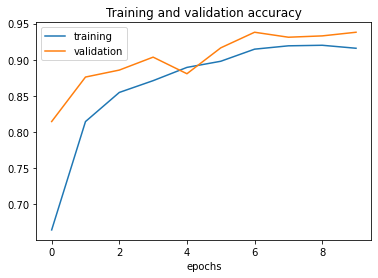

In [26]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [27]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

test acc: 0.9569628834724426


In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  print(classes)
 

Saving rottenorng.png to rottenorng.png
Saving rottenbanana.png to rottenbanana (2).png
Saving rottenapple.png to rottenapple (2).png
Saving freshapple.png to freshapple (2).png
Saving forange.png to forange (1).png
Saving ffbanana.png to ffbanana (1).png
Saving fbanana.png to fbanana (1).png
Saving fapple.png to fapple (1).png
rottenorng.png
[[0. 0. 1. 0. 0. 0.]]
rottenbanana.png
[[0. 0. 0. 0. 1. 0.]]
rottenapple.png
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  7.0930745e-13]]
freshapple.png
[[0. 1. 0. 0. 0. 0.]]
forange.png
[[0. 0. 1. 0. 0. 0.]]
ffbanana.png
[[0. 1. 0. 0. 0. 0.]]
fbanana.png
[[0. 1. 0. 0. 0. 0.]]
fapple.png
[[1. 0. 0. 0. 0. 0.]]
